In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
stop = set(stopwords.words('english'))
for w in ['wa','ha','us','place','translated','great','people','church','aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']:
    STOPWORDS.add(w)

In [5]:
def read_reviews(folder,fname):
    test=pd.read_csv(folder + fname )
    return test['review'].str.cat(sep=' ').replace('\n', ' ')

In [6]:
def lemmatize(string,on_off):
    if on_off == 0:
        return string
    if on_off == 1:
        lemmatizer = WordNetLemmatizer()
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(string)])
        return lemmatized_output

In [7]:
def read_all(denom,lem):
    df = pd.DataFrame(columns =['church','reviews','denomination'])
 
    for key, value in denom.items():
        mypath='C:/Users/aben_/Documents/ISYE 6740/Homework/project/' + key + '/'
        files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
        for file in files:
            review_text = lemmatize(read_reviews(mypath,file),lem)
            row_to_append = pd.DataFrame([{'church':file.split('.')[0], 'reviews':review_text,"denomination": value}])
            df = pd.concat([df,row_to_append])
    return df

In [8]:
def get_bow(df):
    #word cloud by word count (DTM)
    cv=CountVectorizer(stop_words=STOPWORDS, ngram_range=(1, 1))
    bag_of_words = cv.fit_transform(all_text['reviews'])
    bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = cv.get_feature_names_out ())
    return bag_of_words

In [9]:
denominations = {'opc': 2}

In [10]:
all_text=read_all(denominations,0)
all_text

,church,reviews,denomination
0,opc0,My home church; 5 years attending ; we now hav...,2
0,opc1,"Easy to get to, service starts at 1030 am. (Wh...",2
0,opc10,The Word of God is honored and preached here. ...,2
0,opc100,Friendly small fantastic!! Pastor reads the ...,2
0,opc101,"The church of my childhood, the centerpiece o...",2
...,...,...,...
0,opc95,This has been my home church for most of my li...,2
0,opc96,Many Christian Churches today do not preach th...,2
0,opc97,"Great place to worship. Warm, traditional atm...",2
0,opc98,Good people Had a short stay but the people se...,2


In [43]:
bow=get_bow(all_text)
bow

,00,00am,10,100,1030,10am,11,11am,12,125,...,하나님을,하나님의,하는,한인,한인도,한편,함께,향한,현실을,흐름에
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer


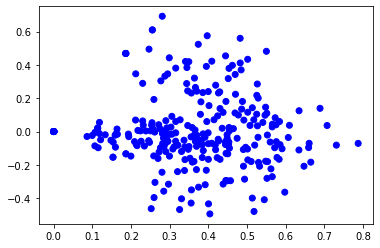

In [45]:
v = TfidfVectorizer(max_features=50,ngram_range=(1,1),use_idf=False,sublinear_tf=False, max_df=.3,stop_words=STOPWORDS)
x = v.fit_transform(all_text['reviews'])
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
principalComponents = svd.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf_concat = pd.concat([all_text.reset_index(),principalDf.reset_index()], axis=1)
colors = {0:'red', 1:'green', 2:'blue'}


fig = plt.figure()
ax = fig.add_subplot(111)

x = principalDf_concat.iloc[:,5]
y = principalDf_concat.iloc[:,6]

ax.scatter(x, y,c = principalDf_concat['denomination'].map(colors))
plt.show()


In [46]:
feature_names = v.get_feature_names_out()
best_features = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]
best_features

['reformed',
 'service',
 'family',
 'gospel',
 'warm',
 'sunday',
 'lord',
 'solid',
 'centered',
 'community',
 'loving',
 'preached',
 'jesus',
 'nice',
 'will',
 'excellent',
 'one',
 'home',
 'come',
 'years',
 'presbyterian',
 'sound',
 'every',
 'members',
 'looking',
 'kind',
 'well',
 'faithful',
 'sermons',
 'visit',
 'hear',
 'true',
 'caring',
 'life',
 'believers',
 'time',
 'scripture',
 'christian',
 'faith',
 'highly',
 'recommend',
 'always',
 'best',
 'new',
 'really',
 'truly',
 'grace',
 'children',
 'thank',
 'hope']

In [47]:
X_tfidf = v.fit_transform(all_text['reviews']).toarray()
vocab = v.vocabulary_
reverse_vocab = {v:k for k,v in vocab.items()}

feature_names = v.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf, columns = feature_names)

idx = X_tfidf.argsort(axis=1)

tfidf_max25 = idx[:,-25:]

df_tfidf['top25'] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max25]

df_tfidf['top25'] 

0      [centered, community, caring, life, faith, fai...
1      [christian, faith, kind, faithful, family, chi...
2      [believers, best, caring, centered, children, ...
3      [looking, believers, best, caring, centered, c...
4      [thank, scripture, reformed, recommend, really...
                             ...                        
273    [grace, faithful, faith, excellent, every, jes...
274    [come, warm, every, excellent, faith, faithful...
275    [best, caring, centered, children, christian, ...
276    [life, believers, best, caring, centered, chil...
277    [caring, centered, children, christian, commun...
Name: top25, Length: 278, dtype: object

In [48]:
global_top25_idx = X_tfidf.max(axis=0).argsort()[-25:]
np.asarray(feature_names)[global_top25_idx]

array(['jesus', 'faith', 'will', 'excellent', 'preached', 'home',
       'sunday', 'community', 'thank', 'life', 'warm', 'true', 'visit',
       'sound', 'lord', 'service', 'reformed', 'nice', 'kind', 'highly',
       'hear', 'faithful', 'every', 'solid', 'years'], dtype=object)